Author: Mitja Jančič

Institute Jozef Stefan 2022

# Import libs

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import h5py as h5

In [2]:
# To run interactive plot.
from matplotlib import interactive
interactive(True)

In [3]:
font = {'family' : 'Times New Roman',
        'size'   : 11}

matplotlib.rc('font', **font)

# Plot solution example

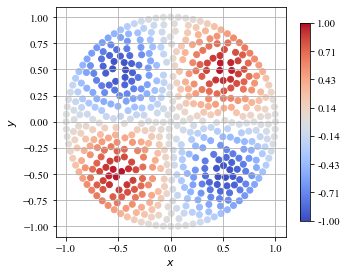

In [4]:
dim = 2
data_filepath = '../data/results_dim_{}.h5'.format(dim)
data = h5.File(data_filepath, 'r')

positions = data['domain/pos'][:]
solution = data['domain/sol'][:]

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

p = ax.scatter(positions[0], positions[1], c = solution, cmap = 'coolwarm', vmin=-1, vmax=1)

ax.set_aspect('equal')
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.grid(True, which="both")
# ax.set_title("example solution")
cbar = fig.colorbar(p, shrink=0.6, ticks=np.linspace(-1, 1, 8))
cbar.ax.set_yticklabels(['{:.2f}'.format(x) for x in np.linspace(-1, 1, 8)])
fig.tight_layout()

if 1:
    plt.savefig('../results/example_Solution.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

# Analysis

## Support sizes

Done with dimension 2.


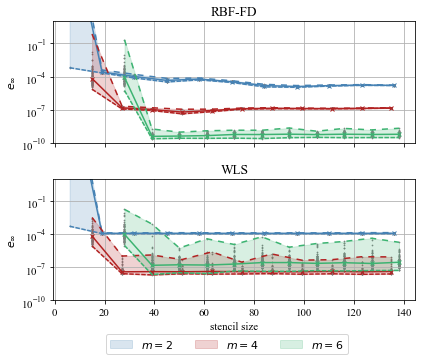

Done with dimension 3.


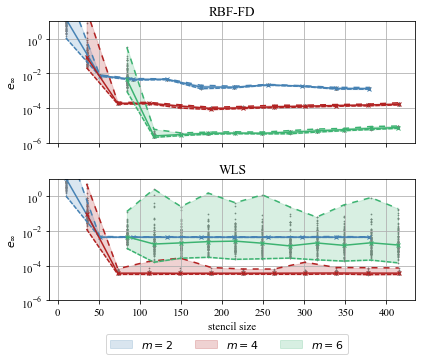

In [5]:
dimensions = [2, 3]
error_type = 'linf' # 'l1', 'l2' or 'linf'
line_colors = ['steelblue', 'firebrick', 'mediumseagreen']

for dim in dimensions:
    # Import data.
    data_filepath = '../data/results_dim_{}_support.h5'.format(dim)
    data = h5.File(data_filepath, 'r')

    # Obtain HDf groups.
    groups = list(data.keys())
    # print(groups)

    # Parse HDF group to get data.
    data_N = np.array(data['Ns'][:][0])
    data_err_1 = np.array(data['err1'][:][0])
    data_err_2 = np.array(data['err2'][:][0])
    data_err_inf = np.array(data['errinf'][:][0])
    data_configs = np.array([entry.decode("utf-8") for entry in list(data.attrs.values())])
    data_nps = [int(_d.split("nps=")[1].split(",")[0]) for _d in data_configs]
    unique_nps = np.unique(data_nps)
    data_supports = [int(_d.split("support=")[1]) for _d in data_configs]
    unique_supports = np.unique(data_supports)
    # print("Example conifg: ", data_configs[0])

    # Plot.
    fig, axs = plt.subplots(2, 1, figsize=(6, 5), sharex=True)
    # fig.suptitle('{}-dimensional domain'.format(dim))

    for basis, ax in zip(['phs', 'mon'], axs):
        for mon_degree, line_color  in zip([2, 4, 6], line_colors):
            _data_indexes = []
            _N = []
            for sup in unique_supports:
                _data_support_indexes = []
                _N_sup = []
                for i in range(len(data_configs)):
                    _global_idx = int(data_configs[i].split('idx=')[1].split(',')[0])

                    if (("m={},".format(mon_degree) in data_configs[i]) and (int(data_configs[i].split("support=")[1]) == sup) and (basis in data_configs[i])):
                        _data_support_indexes.append(_global_idx)
                        _N_sup.append(sup)

                if (len(_data_support_indexes) != 0):
                    _data_indexes.append(_data_support_indexes)
                    _N.append(_N_sup)

            if error_type == 'l1':
                err = [data_err_1[_idx] for _idx in _data_indexes]    
            elif error_type == 'l2':
                err = [data_err_2[_idx] for _idx in _data_indexes]    
            elif error_type == 'linf':
                err = [list(data_err_inf[_idx]) for _idx in _data_indexes]    
            else:
                print('Unexpected error type "%s" choosen.' % error_type)

            ax.scatter(_N, err, c='gray', s=0.5)
            _ = np.mean(_N, axis=1)
            # Error median.
            error_median = np.median(err, axis=1)
            ax.plot(_, error_median, '-x', color=line_color, ms=4)
            # Error min.
            error_min = np.min(err, axis=1)
            ax.plot(_, error_min, linestyle=(0, (3, 1)), color=line_color)
            # Error max.
            error_max = np.max(err, axis=1)
            ax.plot(_, error_max, linestyle=(0, (4, 4)), color=line_color)
            # Fill between.
            ax.fill_between(_, error_min, error_max, color=line_color, alpha=0.2, label='$m={}$'.format(mon_degree))
            ax.grid(True, which="both")


            # Plot properties.
            ax.set_yscale('log')
            if dim == 2:
                ax.set_ylim([1e-10, 1e1])
            else:
                ax.set_ylim([1e-6, 1e1])
            # ax.set_ylim([1e-5, 1e1])
            if error_type == 'l1':
                ax.set_ylabel("$e_1$")
            elif error_type == 'l2':
                ax.set_ylabel("$e_2$")
            elif error_type == 'linf':
                ax.set_ylabel("$e_\infty$")
            else:
                raise ValueError('Unexpected y label.')
            if basis == 'mon':
                ax.set_xlabel("stencil size")
            ax.set_title("RBF-FD" if basis == "phs" else "WLS")
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.15)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc = (0.25, 0.01), ncol=3) 

    print("Done with dimension {}.".format(dim))
    if 1:
        plt.savefig('../results/support_scan_%dd.png' % dim, dpi=300, transparent=False, bbox_inches='tight')
    plt.show()

## Convegence rates

Done with dimension 2.


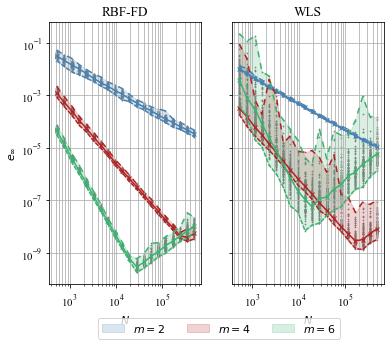

Done with dimension 3.


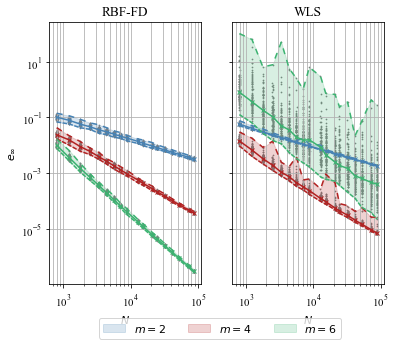

In [6]:
dimensions = [2, 3]
error_type = 'linf' # 'l1', 'l2' or 'linf'
line_colors = ['steelblue', 'firebrick', 'mediumseagreen']

for dim in dimensions:
    # Import data.
    data_filepath = '../data/results_dim_{}.h5'.format(dim)
    data = h5.File(data_filepath, 'r')

    # Obtain HDf groups.
    groups = list(data.keys())
    # print(groups)

    # Parse HDF group to get data.
    data_N = np.array(data['Ns'][:][0])
    data_err_1 = np.array(data['err1'][:][0])
    data_err_2 = np.array(data['err2'][:][0])
    data_err_inf = np.array(data['errinf'][:][0])
    data_configs = np.array([entry.decode("utf-8") for entry in list(data.attrs.values())])
    data_nps = [int(_d.split("nps=")[1].split(",")[0]) for _d in data_configs]
    unique_nps = np.unique(data_nps)
    # print("Example conifg: ", data_configs[0])

    # Plot.
    fig, axs = plt.subplots(1, 2, figsize=(6, 5), sharey=True)
    # fig.suptitle('{}-dimensional domain'.format(dim))

    for basis, ax in zip(['phs', 'mon'], axs):
        for mon_degree, line_color  in zip([2, 4, 6], line_colors):
            _data = [d for d in data_configs if (basis in d) and ('m={}'.format(mon_degree) in d) ]
            _data_indexes = [[int(d.split("=")[-1]) for d in _data if ("nps={},".format(nps) in  d)] for nps in unique_nps]

            N = [data_N[_idx] for _idx in _data_indexes]
            if error_type == 'l1':
                err = [data_err_1[_idx] for _idx in _data_indexes]    
            elif error_type == 'l2':
                err = [data_err_2[_idx] for _idx in _data_indexes]    
            elif error_type == 'linf':
                err = [data_err_inf[_idx] for _idx in _data_indexes]    
            else:
                print('Unexpected error type "%s" choosen.' % error_type)

            N_mean = np.mean(N, axis=1)
            
            # All cases marked with dots.
            ax.scatter(N, err, c='gray', s=0.5)
            # Error median.
            error_median = np.median(err, axis=1)
            ax.plot(N_mean, error_median, '-x', color=line_color, ms=4)
            # Error min.
            error_min = np.min(err, axis=1)
            ax.plot(N_mean, error_min, linestyle=(0, (3, 1)), color=line_color)
            # Error max.
            error_max = np.max(err, axis=1)
            ax.plot(N_mean, error_max, linestyle=(0, (4, 4)), color=line_color)
            # Fill between.
            ax.fill_between(N_mean, error_min, error_max, color=line_color, alpha=0.2, label='$m={}$'.format(mon_degree))
            ax.grid(True, which="both")

            # Helper line.
            if dim == 1:
                e = 2.2204e-16 * np.power(N, 2)
                # Add fit to numerical precision
                ax.plot(N, e, 'k:', label='_nolegend_', linewidth = 1.5)

            # Plot properties.
            ax.set_xscale('log')
            ax.set_yscale('log')
            if basis != 'mon':
                if error_type == 'l1':
                    ax.set_ylabel("$e_1$")
                elif error_type == 'l2':
                    ax.set_ylabel("$e_2$")
                elif error_type == 'linf':
                    ax.set_ylabel("$e_\infty$")
                else:
                    raise ValueError('Unexpected y label.')
            ax.set_xlabel("$N$")
            ax.set_title("RBF-FD" if basis == "phs" else "WLS")
    fig.subplots_adjust(bottom=0.15)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc = (0.25, 0.01), ncol=3) 

    print("Done with dimension {}.".format(dim))
    if 1:
        plt.savefig('../results/fill_trumpet_%dd.png' % dim, dpi=300, transparent=False, bbox_inches='tight')
    plt.show()

## Evaluate spread

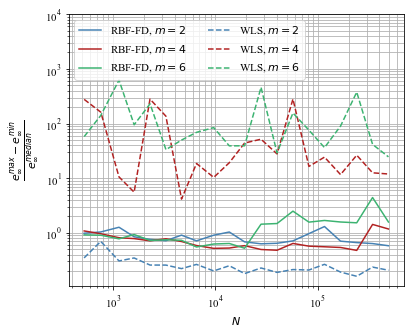

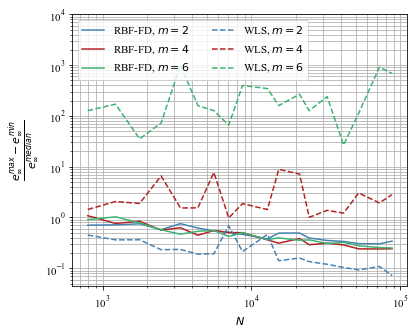

In [7]:
dimensions = [2, 3]
error_type = 'linf' # 'l1', 'l2' or 'linf'
line_colors = ['steelblue', 'firebrick', 'mediumseagreen']

for dim in dimensions:
    # Import data.
    data_filepath = '../data/results_dim_{}.h5'.format(dim)
    data = h5.File(data_filepath, 'r')

    # Obtain HDf groups.
    groups = list(data.keys())
    # print(groups)

    # Parse HDF group to get data.
    data_N = np.array(data['Ns'][:][0])
    data_err_1 = np.array(data['err1'][:][0])
    data_err_2 = np.array(data['err2'][:][0])
    data_err_inf = np.array(data['errinf'][:][0])
    data_configs = np.array([entry.decode("utf-8") for entry in list(data.attrs.values())])
    data_nps = [int(_d.split("nps=")[1].split(",")[0]) for _d in data_configs]
    unique_nps = np.unique(data_nps)
    # print("Example conifg: ", data_configs[0])

    # Plot.
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))

    for basis, line_style in zip(['phs', 'mon'], ['-', '--' ]):
        for mon_degree, line_color  in zip([2, 4, 6], line_colors):
            _data = [d for d in data_configs if (basis in d) and ('m={}'.format(mon_degree) in d) ]
            _data_indexes = [[int(d.split("=")[-1]) for d in _data if ("nps={},".format(nps) in  d)] for nps in unique_nps]

            N = [data_N[_idx] for _idx in _data_indexes]
            if error_type == 'l1':
                err = [data_err_1[_idx] for _idx in _data_indexes]    
            elif error_type == 'l2':
                err = [data_err_2[_idx] for _idx in _data_indexes]    
            elif error_type == 'linf':
                err = [data_err_inf[_idx] for _idx in _data_indexes]    
            else:
                print('Unexpected error type "%s" choosen.' % error_type)

            N_mean = np.mean(N, axis=1)

            # Error median.
            error_median = np.median(err, axis=1)
            # Error min.
            error_min = np.min(err, axis=1)
            # Error max.
            error_max = np.max(err, axis=1)

            engine = 'RBF-FD' if basis == "phs" else 'WLS'
            ax.plot(N_mean, (error_max - error_min) / error_median, ls = line_style, c = line_color, label = '{}, $m={}$'.format(engine, mon_degree))
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel("$N$")
    ax.set_ylabel(r'$ \dfrac{e^{max}_\infty - e^{min}_\infty}{e_{\infty}^{median}}$')
    ax.grid(True, which="both")
    # ax.set_title("normalized spread size: {}-dimensional domain".format(dim))
    ax.set_ylim(top=1e4)
    ax.legend(loc='upper left', ncol=2)
    
    if 1:
        plt.savefig('../results/spread_%dd.png' % dim, dpi=300, transparent=False, bbox_inches='tight')
    plt.show()
    